# Exoplanets app

## > What does it do?
1. Count exoplanets discovered in certain period of years
2. Retrieve informations regarding the exoplanets and its host star
3. Plot useful relationships regarding exoplanet research

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
from IPython import display
from time import sleep
from matplotlib.animation import FuncAnimation
%matplotlib inline

planets = pd.read_csv("exoplanet.csv")
#planets.set_index('loc_rowid', inplace=True)

In [26]:
#Dictionary #Renaming columns to a more meaningful columns
planets.rename(columns={'pl_name':'Planet_Name',
                        'hostname':'Host_Star',
                        'sy_snum':'Number of Stars',
                        'sy_pnum':'Number of Planets',
                        'disc_year':'Discovery Year',
                        'disc_facility':'Discovery_Facility',
                        'pl_orbper':'Orbital_Period(Years)',
                        'pl_orbeccen':'Eccentricity',
                        'st_spectype':'Spectral_Type',
                        'st_teff':'Stellar_Effective_Temperature(K)',
                        'st_mass':'Stellar_Mass(Mo)',
                        'rastr':'RA',
                        'ra':'RA_deg',
                        'decstr':'Dec_Sexadecimals',
                        'st_rad':'Stellar_Radius',
                        'sy_dist':'Distance_pc',
                        'sy_gaiamag':'Gaia_Magnitude',
                        'dec':'Dec'
                       }, inplace = True)

In [27]:
#Dropping columns unrelated to the program. #Cleaning the data
planets.drop(columns=['pl_radeerr1',
                      'pl_radeerr2',
                      'pl_radelim',
                      'pl_radj',
                      'pl_radjerr1',
                      'pl_radjerr2',
                      'pl_radjlim',
                      'pl_rade',
                     'pl_orbeccenerr1',
                      'pl_orbeccenerr2',
                      'st_tefferr1',
                      'st_tefferr2',
                      'st_tefflim',
                      'st_raderr1',
                      'st_raderr2',
                      'st_radlim',
                      'st_masserr1',
                      'st_masserr2',
                      'st_masslim',
                      'sy_disterr1',
                      'sy_disterr2',
                      'sy_gaiamagerr2',
                      'sy_gaiamagerr1',
                     'pl_orbpererr1',
                      'pl_eqt',
                      'RA_deg',
                      'Dec_Sexadecimals',
                      'pl_eqterr1',
                      'pl_eqterr2',
                      'pl_eqtlim',
                      'pl_orbpererr2',
                      'pl_orbperlim',
                      'pl_orbsmax',
                      'pl_orbsmaxerr1',
                      'pl_orbsmaxerr2',
                      'pl_orbsmaxlim',
                      'pl_orbeccenlim',], inplace=True)

In [28]:
#Filling in empty elements
nan_dict_fill = {('Orbital_Period(Years)','Distance_pc','Eccentricity','Stellar_Radius ','Stellar_Mass(Mo)'):'Data Not Available',
                  ('Spectral_Type','Stellar_Effective_Temperature(K)','Gaia_Magnitude'):'Insufficient Data'}
planets.fillna(value= 'Data Unavailable', inplace = False)

planets.rename_axis('Index', inplace = True)
planets.head()

,Planet_Name,Host_Star,Number of Stars,Number of Planets,discoverymethod,Discovery Year,Discovery_Facility,Orbital_Period(Years),Eccentricity,Spectral_Type,Stellar_Effective_Temperature(K),Stellar_Radius,Stellar_Mass(Mo),RA,Dec,Distance_pc,Gaia_Magnitude
Index,,,,,,,,,,,,,,,,,
0,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,0.231,G8 III,4742.0,19.00,2.70,12h20m42.91s,17.793252,93.1846,4.44038
1,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,0.080,K4 III,4213.0,29.79,2.78,15h17m05.90s,71.823943,125.3210,4.56216
2,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,0.000,K0 III,4813.0,11.00,2.20,23h31m17.80s,39.235837,75.4392,4.91781
3,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,0.370,K0 V,5338.0,0.93,0.90,16h10m24.50s,43.816362,17.9323,6.38300
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.50000,0.680,G3 V,5750.0,1.13,1.08,19h41m51.75s,50.516824,21.1397,6.06428


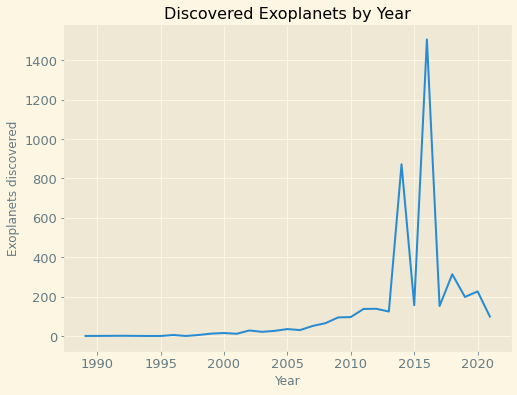

In [35]:
plt.style.use('Solarize_Light2')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 13
plt.title('Discovered Exoplanets by Year')
plt.xlabel("Year")
plt.ylabel("Exoplanets discovered")

# Which year has the most discovered exoplanets?
output = planets['Discovery Year'].value_counts().sort_index().plot() #default plot is line graph



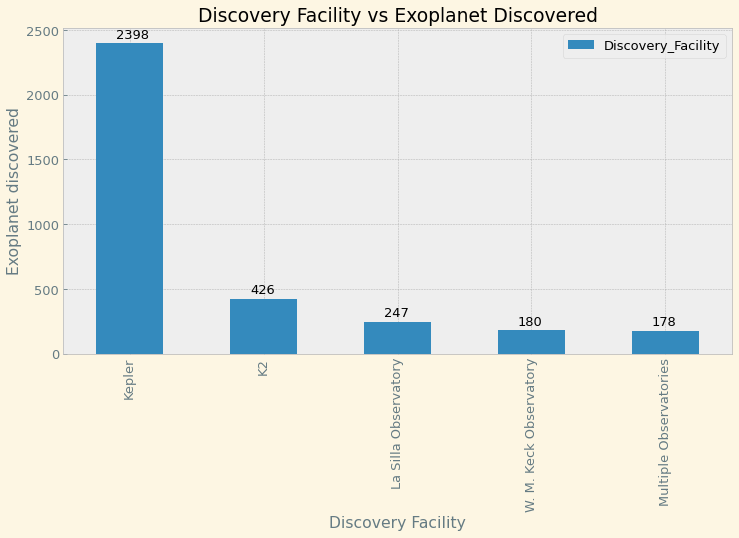

In [17]:
#Top 5 facilities
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 13
plt.xlabel("Discovery Facility")
plt.ylabel("Exoplanet discovered")
plt.title('Discovery Facility vs Exoplanet Discovered')

#i gives the count of y
#v gives the value of y
y = list(planets['Discovery_Facility'].value_counts())
y_5 = y[0:5] #creates new list of y, having only the top 5 elements
for i, v in enumerate(y_5):

    plt.text(i-0.10, v + 40, str(v))


ax = planets['Discovery_Facility'].value_counts().head().plot(kind='bar', grid = True, legend = True)


<AxesSubplot:title={'center':'Discovery Method vs Exoplanet Discovered'}, xlabel='Discovery Method', ylabel='Exoplanet discovered'>

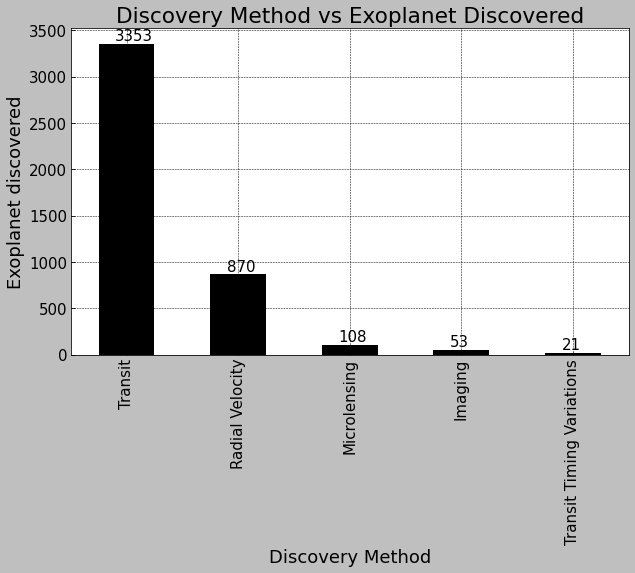

In [18]:
#Top 5 discovery methods
plt.style.use('grayscale')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 15
plt.xlabel("Discovery Method")
plt.ylabel("Exoplanet discovered")
plt.title('Discovery Method vs Exoplanet Discovered')

y = list(planets['discoverymethod'].value_counts())
y_5 = y[0:5] #creates new list of y, having only the top 5 elements
for i, v in enumerate(y_5):
    plt.text(i-0.10, v + 35, str(v))

planets['discoverymethod'].value_counts().head().plot(kind='bar')

In [ ]:
#What is the  relationship between distance and brightness of the exoplanets?
planets[['Distance_pc','Gaia_Magnitude']].dropna().plot(kind = 'scatter', x='Gaia_Magnitude', y='Distance_pc')
plt.style.use('ggplot')
plt.title('Gaia Magnitude vs Distance(pc)')

In [46]:
#Count the number of exoplanets discovered in certain periods of years
def count_exoplanet_year():
    #user inputs initial and final year
    print("Let's find out how many exoplanets we have discovered!")
    while True: #We loop through until correct inputs are entered
        try: #try/except to catch error
            inp_initial_year = int(input("Initial Year: ")) #inputs from user
            inp_final_year = int(input("Final Year: "))
            totl = int(planets[(planets['Discovery Year']>=inp_initial_year)&(planets['Discovery Year']<=inp_final_year)].count()[['Discovery Year']])
            if inp_initial_year==inp_final_year: # This is for single year
                print(f"Total exoplanets discovered in {inp_initial_year} is {totl}")
                break
            else:
                print(f"Total exoplanets discovered between {inp_initial_year} and {inp_final_year} is {totl}")
                break
        except:
            print(f"Please enter integer values only")
#Retrieve informations about a particular planet
def information_exoplanet(planet_name):
    return planets[(planets['Planet_Name']==planet_name)].head(1)



In [48]:
information_exoplanet('16 Cyg B b')

,Planet_Name,Host_Star,Number of Stars,Number of Planets,discoverymethod,Discovery Year,Discovery_Facility,Orbital_Period(Years),Eccentricity,Spectral_Type,Stellar_Effective_Temperature(K),Stellar_Radius,Stellar_Mass(Mo),RA,Dec,Distance_pc,Gaia_Magnitude
Index,,,,,,,,,,,,,,,,,
4,16 Cyg B b,16 Cyg B,3,1,Radial Velocity,1996,Multiple Observatories,798.5,0.68,G3 V,5750.0,1.13,1.08,19h41m51.75s,50.516824,21.1397,6.06428


In [ ]:
#A class of exoplanet's discovery methods
class discovery_methods:
    def __init__(self,methods):
        self.methods = methods
        
        #show picture of the discovery methods
    def animate(self):
        if self.methods == 'Radial Velocity':
            image = 'radial velocity.gif'
        elif self.methods == 'Astrometry':
            image = 'astrometry.gif'
        elif self.methods == 'Eclipse Timing Variation' or self.methods == 'Transit Timing Variation':
            image = 'eclipse timing.gif'
        elif self.methods == 'Transit':
            image = 'transit.gif'
        elif self.methods == 'Pulsar Timing':
            image = 'pulsar.gif'
        elif self.methods == 'Imaging':
            image = 'imaging.jpg'
        elif self.methods == 'Orbital Brightness Modulation':
            image = 'orbital modulation.jpg'
        elif self.methods == 'Microlensing':
            image = 'microlens.jpg'
        else:
            image = 'protoplanetary disc.gif'     
        img = mpimg.imread(image)
        plt.imshow(img)
        
        
    def description(self):
        if self.methods == 'Radial Velocity':
            print = ("Measurement from the star's doppler shift")
        elif self.methods == 'Astrometry':
            print = ("Measurement from the actual movement of the star")
        elif self.methods == 'Eclipse Timing Variation' or self.methods == 'Transit Timing Variation':
            print = ("Measurement from the repeated period of transit or eclipse")
        elif self.methods == 'Transit':
            print = ("Measurement from the dip in brightness")
        elif self.methods == 'Pulsar Timing':
            print = ("Measurement from the pulse irregularities of the pulsar")
        elif self.methods == 'Imaging':
            print = ("Direct imaging of the planets")
        elif self.methods == 'Orbital Brightness Modulation':
            print = ("Measurement of the change in brightness of the host star due to gravitational pull from the planet")
        elif self.methods == 'Microlensing':
            print = ("Direct imaging of the planets")
        else:
            print = ("Measurement from the protoplanetary disk")
            
